<a href="https://colab.research.google.com/github/sevinduImsara/ML_CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

**Fetch dataset from git**

In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

**Merge "Y" column with "X"**

In [28]:
X["income"] = y

In [29]:
X.to_csv("Data_Analysis")

In [30]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
X.shape

(48842, 15)

In [32]:
 X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Merge 4 income category into 2**

In [34]:
 X["income"].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [45]:
X["income"]= X['income'].replace('<=50K.','<=50K')
X["income"]= X['income'].replace('>50K.','>50K')

In [46]:
X['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [47]:
X['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [48]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [49]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [50]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

**dropping columns**


In [51]:
X=X.drop(['fnlwgt','education'], axis = 1)
X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Check null**

In [54]:
nun_val= X.isnull().sum()
Tot_nun_val=nun_val.sum()
print(nun_val)
print("Total Nun Value : ", Tot_nun_val)

age                  0
workclass         2799
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64
Total Nun Value :  6465


In [55]:
specific_line = X.iloc[27]
print(specific_line)

age                               54
workclass                        NaN
education-num                     10
marital-status    Married-civ-spouse
occupation                       NaN
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


**replace ? with Nan**

In [56]:
X.replace('?',np.NaN,inplace = True)
X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
specific_line = X.iloc[27]
print(specific_line)

age                               54
workclass                        NaN
education-num                     10
marital-status    Married-civ-spouse
occupation                       NaN
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


**Replacing Nan with forward filling**

In [58]:
X.fillna(method = 'ffill', inplace = True)

In [61]:
nun_val= X.isnull().sum()
print(nun_val)

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


**Label Encording**

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['workclass'] = le.fit_transform(X['workclass'])
X['marital-status'] = le.fit_transform(X['marital-status'])
X['occupation'] = le.fit_transform(X['occupation'])
X['relationship'] = le.fit_transform(X['relationship'])
X['race'] = le.fit_transform(X['race'])
X['sex'] = le.fit_transform(X['sex'])
X['native-country'] = le.fit_transform(X['native-country'])
X['income'] = le.fit_transform(X['income'])

X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


**AGE Vs Income**

<Axes: xlabel='income', ylabel='age'>

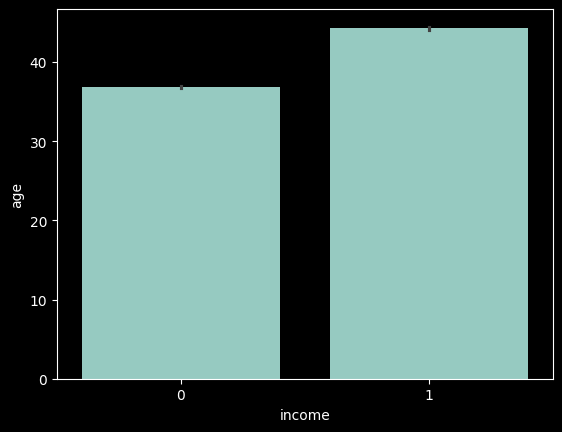

In [67]:
sns.barplot(x = 'income', y = 'age', data = X)

In [69]:
sns.pairplot(X, hue = 'income', palette = 'inferno')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b77db610280> (for post_execute):


KeyboardInterrupt: 

<Axes: >

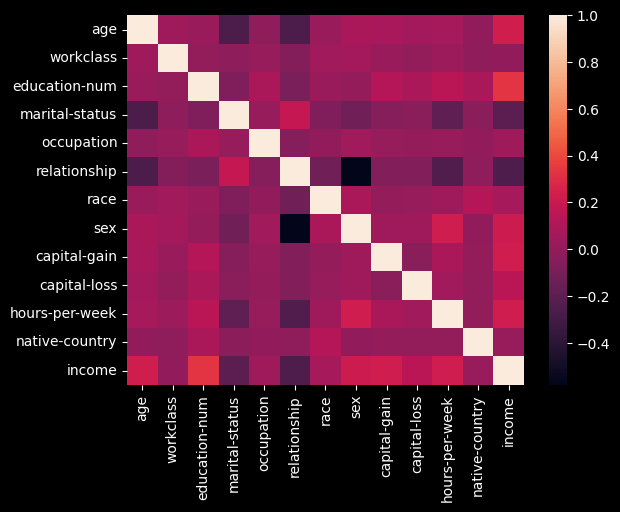

In [70]:
sns.heatmap(X.corr())

**Split features and target**

In [71]:
x = X.drop(['income'], axis = 1)
y = X['income']

**Spliting data set**

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [74]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Evaluation Metrix**

In [76]:
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7354
           1       0.69      0.32      0.44      2415

    accuracy                           0.80      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.78      0.80      0.77      9769

[[7002  352]
 [1633  782]]
79.68062237690654
